In [41]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 39.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# 1.Library

## Sun


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
import os.path as osp
import torch.utils.data as data
import torch.nn.functional as F

from tqdm import tqdm
import time, matplotlib, torch, os
from statsmodels.tsa.arima_model import ARIMA
from torch.utils.tensorboard import SummaryWriter

In [2]:
import os
from os import walk

import plotly
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
#import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
#For DNN / CNN+LSTM
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Flatten, Dense

In [5]:
#For SVR
from sklearn.svm import SVR

#For SVM
from sklearn import svm
from sklearn.svm import SVC

In [6]:
#For ARIMA
import math
import warnings
warnings.filterwarnings('ignore')
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## Anthony

In [7]:
!pip install -q stockstats

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from stockstats import StockDataFrame

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from math import floor

import pandas_datareader.data as web
import pickle

In [9]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from stockstats import StockDataFrame

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from math import floor

import pandas_datareader.data as web
import pickle

# 2.Data importing and preprocessing

## Sun

Data Preprocessing

In [10]:
def finder(ds,target):
  for e in ds:
    if code in e:
      return e

def timestamp(i):
  formatted_date = datetime.fromtimestamp(i)
  return formatted_date

Using pandas datareader for analysis

In [11]:
import pandas_datareader.data as web

#Setting the index values as timestamp
def process():
  print("Enter the code of the model that you want to implement")
  df_ = web.DataReader("AAPL", 'stooq')
  #print(f"Loading the dataset for the {code}")

  return df_

In [12]:
#For now, the stock values for Apple (AAPL is returned)
df = process()

Enter the code of the model that you want to implement


In [13]:
def additional_features(df):
  #SMA
  df['10_sma'] = df['Close'].rolling(window=10,min_periods=1).mean()
  df['20_sma'] = df['Close'].rolling(window=20,min_periods=1).mean()
  df['50_sma'] = df['Close'].rolling(window=50,min_periods=1).mean()
  
  #EMA
  df['10_ema'] = df['Close'].ewm(span=10,min_periods=1).mean()
  df['20_ema'] = df['Close'].ewm(span=20,min_periods=1).mean()
  df['50_ema'] = df['Close'].ewm(span=50,min_periods=1).mean()

  #Bollinger
  df['bollinger_mean'] = df['Close'].rolling(20, min_periods=1).mean()
  df['bollinger_std'] = df['Close'].rolling(20, min_periods=1).std()
  df['BOL_UP'] = df['bollinger_mean'] + (2 * df['bollinger_std'])
  df['BOL_DOWN'] = df['bollinger_mean'] - (2 * df['bollinger_std'])
  df["bollinger_gap"] = df["BOL_UP"]-df['BOL_DOWN']
  df.dropna(inplace=True) #Not sure if I can change?

  price_change =  df['Close'].pct_change().fillna(0)
  df['percetage_change'] = price_change

  momentum = [1,1]
  for i in range(2,len(df)):
    momentum.append(1 if df['Close'][i] > df['Close'][i-1] else -1)
  df['momentum'] = momentum

In [14]:
#Print the database for the implementations
additional_features(df)
df.head()

,Open,High,Low,Close,Volume,10_sma,20_sma,50_sma,10_ema,20_ema,50_ema,bollinger_mean,bollinger_std,BOL_UP,BOL_DOWN,bollinger_gap,percetage_change,momentum
Date,,,,,,,,,,,,,,,,,,
2022-04-26,162.25,162.3400,156.72,156.80,95623240,156.685000,156.685000,156.685000,156.696500,156.690750,156.687300,156.685000,0.162635,157.010269,156.359731,0.650538,0.000000,1
2022-04-25,161.12,163.1700,158.46,162.88,96046376,158.750000,158.750000,158.750000,159.182226,158.963405,158.834642,158.750000,3.578533,165.907066,151.592934,14.314133,0.038776,1
2022-04-22,166.46,167.8699,161.50,161.79,84882424,159.510000,159.510000,159.510000,160.041371,159.779400,159.618391,159.510000,3.293580,166.097159,152.922841,13.174318,-0.006692,-1
2022-04-21,168.91,171.5300,165.91,166.42,87227768,160.892000,160.892000,160.892000,161.872502,161.385704,161.089670,160.892000,4.205398,169.302795,152.481205,16.821591,0.028617,1
2022-04-20,168.76,168.8800,166.10,167.23,67929814,161.948333,161.948333,161.948333,163.264029,162.618584,162.218069,161.948333,4.565450,171.079234,152.817433,18.261801,0.004867,1


VWAP = (Cumulative (Price * Volume)) / (Cumulative Volume)

Comparison between VWAP of the Tesla share we calculated previously.



In [15]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', '10_sma', '20_sma', '50_sma',
       '10_ema', '20_ema', '50_ema', 'bollinger_mean', 'bollinger_std',
       'BOL_UP', 'BOL_DOWN', 'bollinger_gap', 'percetage_change', 'momentum'],
      dtype='object')

In [16]:
df['Cum_Vol'] = df['Volume'].cumsum()
avg = df['High'] + df['Low'] + df['Close']
df['Cum_Price'] = (df['Volume'] * (avg/3)).cumsum()
df['VWAP'] = df['Cum_Price'] / df['Cum_Vol']

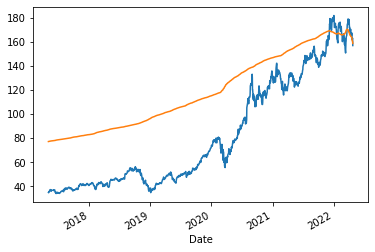

In [17]:
df["Close"].plot.line()
df["VWAP"].plot.line()

Calculating the TWAP

Average of each day’s price = (Open + High + Low + Close)/4

In [18]:
df['TWAP'] = (df['Open']+df["Close"]+df["Low"]+df["High"]) / 4

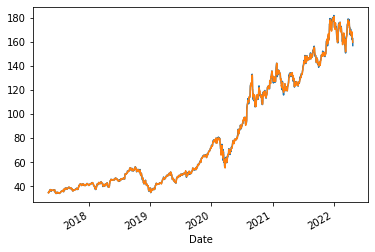

In [19]:
df["Close"].plot.line()
df["TWAP"].plot.line()

Facebook Prophet

## Additional preprocessing for backtesting

In [20]:
#Leave olhc
df_olhcv = df[['Open','High','Low','Close','Volume']]
df_olhcv.columns = df_olhcv.columns.str.lower()
df_olhcv.head()

,open,high,low,close,volume
Date,,,,,
2022-04-26,162.25,162.3400,156.72,156.80,95623240
2022-04-25,161.12,163.1700,158.46,162.88,96046376
2022-04-22,166.46,167.8699,161.50,161.79,84882424
2022-04-21,168.91,171.5300,165.91,166.42,87227768
2022-04-20,168.76,168.8800,166.10,167.23,67929814


In [21]:
y = StockDataFrame(df_olhcv)
data_bt = y[['open','high','low','close','volume',
          'boll', 'boll_ub', 'boll_lb',
          'macd', 'macdh', 'macds',
          'rsi_11', 'rsi_14', 'rsi_21']]
data_bt.index = [int(str(ind)[0:4]+str(ind)[5:7]+str(ind)[8:10]) for ind in data_bt.index]
data_bt = data_bt.sort_index()
data_bt.head()

,open,high,low,close,volume,boll,boll_ub,boll_lb,macd,macdh,macds,rsi_11,rsi_14,rsi_21
20170501,34.248,34.750,34.217,34.600,142039827,35.99960,37.579161,34.420039,-0.255224,-0.257799,0.002575,33.553945,36.906231,41.129974
20170502,34.829,34.952,34.662,34.821,188242231,36.09090,37.535129,34.646671,-0.189361,-0.256385,0.067024,35.766661,38.789637,42.504302
20170503,34.363,34.816,34.053,34.717,193228209,36.16000,37.474851,34.845149,-0.125043,-0.256163,0.131120,33.901917,37.393526,41.630180
20170504,34.584,34.737,34.413,34.587,98908215,36.23945,37.365671,35.113229,-0.030542,-0.225703,0.195161,31.646984,35.691007,40.554265
20170505,34.644,35.167,34.644,35.162,115775840,36.35245,37.199479,35.505421,0.103757,-0.147830,0.251587,36.678356,40.178529,43.968271


In [22]:
# Split the train and test data
def custom_split(data,start,end):
    train = (data.index >= start) & (data.index <= end)
    train_X = data[train]
    
    return train_X

In [23]:
start_date = []
num_period = 10
period_year = 1

start = 2022-(num_period+period_year-1)
for i in range(num_period):
    start_date.append((start+i)*10000+101)


date_range_list={}
for i in start_date:
    date_range_list[i] = (i-101)+(period_year-1)*10000+1231

print(date_range_list)

stock_list = {"BlockChain":["COIN","NVDA","FB"],
              "Airline":["BA","GD","LMT",],
              "Traveling":["UBER","ABNB","MAR","BKNG"],
              "Semiconductors":["INTC","NVDA","QCOM","MU","AMD"],
              "Cloud Computing":["IBM", "AMZN","GOOG","CRM"],
              "Social Media":["TWTR","SNAP","PINS","FB"],
              "Entertainment":["DIS","NFLX","FB"],
              "Retail":["WMT","COST","TGT","BBY","HD"],
              "Franchise":["MCD", "YUM", "SBUX", "DPZ"],
              "Real Estate":["HST", "EQR", "AVB", "PLD", "SPG"],
              "Telecommunication":["T","TMUS","VZ","CMCSA","CHTR"],
              "Energy & Resources":["DOW", "DD"],
              "Luxury goods":["RACE","EL","PVH"]
                            }

start_date = "2000-01-01"
end_date = "2022-12-31"


do_nth_name = "Buy&Hold"
model_name = "WithModel"

backtest_col = ["Sector","Stock",
                "Range_Start","Range_End",
                do_nth_name+"_Profit",model_name+"_Profit",
                do_nth_name+"_CAGR(in %)",model_name+"_CAGR(in %)",
                "CAGR_Performance(in %)",
                do_nth_name+"_MDD(in %)",model_name+"_MDD(in %)",
                "MDD_Performance(in %)"]

{20120101: 20121231, 20130101: 20131231, 20140101: 20141231, 20150101: 20151231, 20160101: 20161231, 20170101: 20171231, 20180101: 20181231, 20190101: 20191231, 20200101: 20201231, 20210101: 20211231}


# ARIMA

In [24]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [28]:
df_olhcv

,open,high,low,close,volume,boll,boll_ub,boll_lb,macd,macds,macdh,rs_11,rsi_11,rs_14,rsi_14,rs_21,rsi_21
Date,,,,,,,,,,,,,,,,,
2022-04-26,162.250,162.3400,156.720,156.800,95623240,156.80000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-25,161.120,163.1700,158.460,162.880,96046376,159.84000,168.438418,151.241582,0.136410,0.075783,0.060627,inf,100.000000,inf,100.000000,inf,100.000000
2022-04-22,166.460,167.8699,161.500,161.790,84882424,160.49000,166.973548,154.006452,0.140013,0.102107,0.037906,5.070892,83.527957,5.179554,83.817603,5.312363,84.158073
2022-04-21,168.910,171.5300,165.910,166.420,87227768,161.97250,169.921661,154.023339,0.305384,0.170968,0.134417,9.743369,90.691933,9.754007,90.701141,9.772455,90.717065
2022-04-20,168.760,168.8800,166.100,167.230,67929814,163.02400,171.360961,154.687039,0.421048,0.245361,0.175687,10.642544,91.410812,10.615850,91.391073,10.591744,91.373171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-05,34.644,35.1670,34.644,35.162,115775840,36.35245,37.199479,35.505421,0.103757,0.251587,-0.147830,0.579239,36.678356,0.671641,40.178529,0.784703,43.968271
2017-05-04,34.584,34.7370,34.413,34.587,98908215,36.23945,37.365671,35.113229,-0.030542,0.195161,-0.225703,0.462993,31.646984,0.554992,35.691007,0.682206,40.554265
2017-05-03,34.363,34.8160,34.053,34.717,193228209,36.16000,37.474851,34.845149,-0.125043,0.131120,-0.256163,0.512903,33.901917,0.597279,37.393526,0.713214,41.630180


In [29]:
df = df_olhcv
df.head()

,open,high,low,close,volume,boll,boll_ub,boll_lb,macd,macds,macdh,rs_11,rsi_11,rs_14,rsi_14,rs_21,rsi_21
Date,,,,,,,,,,,,,,,,,
2022-04-26,162.25,162.3400,156.72,156.80,95623240,156.8000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-25,161.12,163.1700,158.46,162.88,96046376,159.8400,168.438418,151.241582,0.136410,0.075783,0.060627,inf,100.000000,inf,100.000000,inf,100.000000
2022-04-22,166.46,167.8699,161.50,161.79,84882424,160.4900,166.973548,154.006452,0.140013,0.102107,0.037906,5.070892,83.527957,5.179554,83.817603,5.312363,84.158073
2022-04-21,168.91,171.5300,165.91,166.42,87227768,161.9725,169.921661,154.023339,0.305384,0.170968,0.134417,9.743369,90.691933,9.754007,90.701141,9.772455,90.717065
2022-04-20,168.76,168.8800,166.10,167.23,67929814,163.0240,171.360961,154.687039,0.421048,0.245361,0.175687,10.642544,91.410812,10.615850,91.391073,10.591744,91.373171


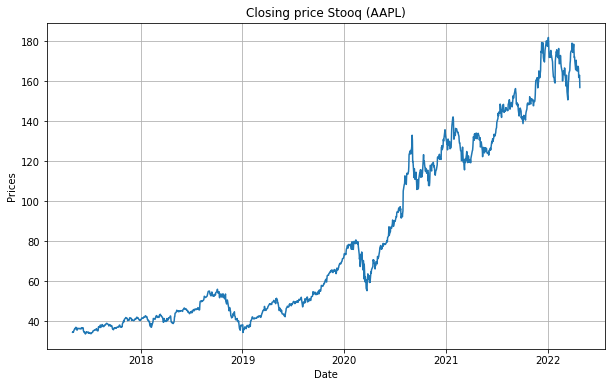

In [31]:
#Closing price index
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Prices')
plt.plot(df['close'])
plt.title('Closing price Stooq (AAPL)')
plt.show()

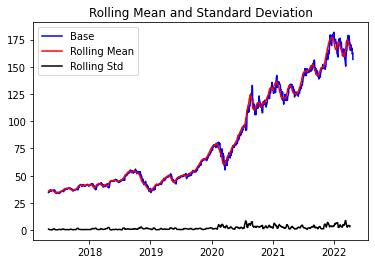

Results of dickey fuller test
Test Statistics           -1.992150
p-value                    0.290026
# lags                    20.000000
# observations used     1236.000000
critical value (1%)       -3.435652
critical value (5%)       -2.863881
critical value (10%)      -2.568016
dtype: float64


In [32]:
df_close = df['close']

#For the ADF test

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() #window size 12 mean

    """
    Price Volatility를 표시할 때, 표준편차를 사용하신 이유가 있나요? 
    ATR과 Standard Deviation 차이점 관련해서 찾아본 결과, 일반적으로 Std를 많이 사용한다고 나와 있더라고요.
    둘 사이 차이점, 특히 어떤 상황에서 사용하기 좋은지 궁금합니다.

    A: 가장 흔한 이유는 price volatility 같은 경우는 normalize가 안되어있고 std 같은경우는 데이터값이 normalize 되기 때문에 학습에 더 용이합니다

    그리고 왜 주기를 12일로 정하셨는지도 궁금합니다.

    A: 주기가 12일인거는 컨벤션으로 볼링어 밴드 때 14일인거랑 비슷합니다. stochastic value입니다!

    """
    

    rolstd = timeseries.rolling(12).std() #windoiw size 12 std
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Base')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    """
    Dickey-Fuller Test가 정확하게 어떤 목적으로 사용되는 건가요?

    간략하게 찾아보니, 주어진 time series가 stationary또는 non-stationary한지를 판별하고,
    Non-stationary의 경우에는 time value에 따른 error term 또는 deterministic trend를 리턴;
    Starionary의 경우에는 time value가 주어지지 않고, error term 또는 deterministic trend만 리턴한다고 하는데,
    개념이 명확하게 이해가 가지 않습니다.

    A: Dickey Fuller 테스트를 진행하는 이유는 데이터셋이 특정 trend/seasonality 에 휘둘리지 않고 stationary 한지 non-stationary 한지를 분별하는 테스트입니다. 일종의 classification 이라고 할 수 있겠네요!

    그리고 Dickey-Fuller Test와 Augmented Dickey-Fuller Test의 차이점이 무엇인가요?
    
    A: NULL hypothesis가 다른 걸로 알고 있습니다.Augmented 의 경우 non-stationary data들의 unit root 가 존재한다고 가정합니다
    여기서 unit root란 unpredictable systematic drift 로써, 주어진 AR(1) 모델이 random walk 인지 아닌지를 검증하는 거라고 할 수 있습니다!
    
    """

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    # Resulting test statistics, p-value, lags used and number of observation
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','# lags','# observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 432x288 with 0 Axes>

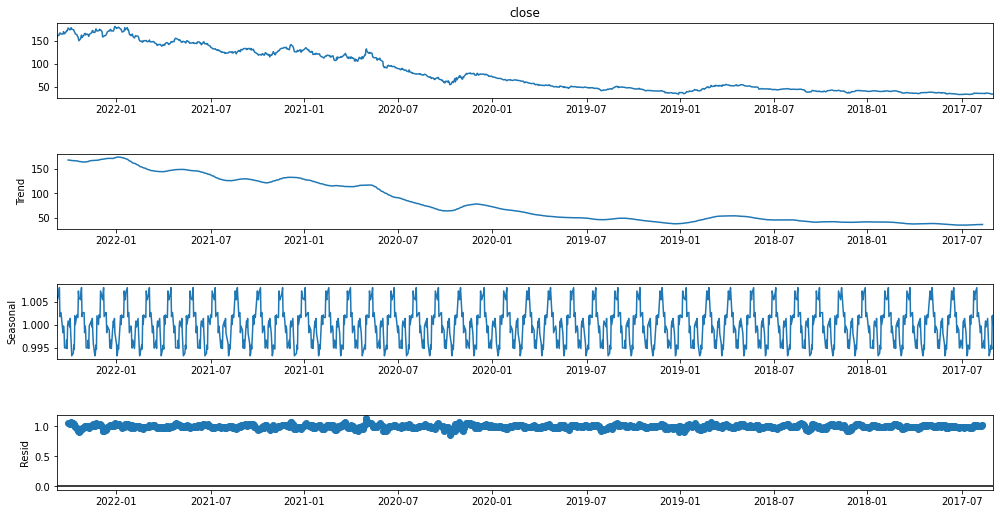

In [33]:
#The data is non-linear
#Analyzing the Close, Trend, and seasonality
result = seasonal_decompose(df_close, model='multiplicative', period = 30)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 8)

No handles with labels found to put in legend.


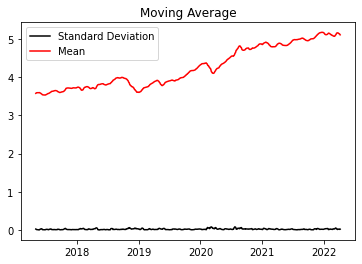

In [34]:
#Modify the moving average (optional)
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [38]:
df_log[3:int(len(df_log)*0.9)]
df_log[int(len(df_log)*0.9):]

Date
2017-10-26    3.623167
2017-10-25    3.616685
2017-10-24    3.621082
2017-10-23    3.615206
2017-10-20    3.615610
                ...   
2017-05-05    3.559966
2017-05-04    3.543478
2017-05-03    3.547229
2017-05-02    3.550221
2017-05-01    3.543854
Name: close, Length: 126, dtype: float64

'\n(질문은 아닙니다.)\n생각해보니까 LSTM 모델은 Sequential Data를 필요로 한다는 걸 잊고 있었네요...\n저는 한 Asset 가격 데이터를 세 부분으로 나누었는데, 일단 이렇게 처리한 데이터셋은 잠시 보류하고 (date index가 discrete하게 구성되어 있는 관계로),\n여기 하신 것처럼 sequential daily basis로 prediction 진행하겠습니다.\n\n아마 나뉘어진 데이터셋은 추후 sequential input 상관 없는 모델로 prediction 진행할 때 사용해도 좋을 것 같습니다.\n\nA: 넵 sequential dataset으로 접근하는 게 더 좋을것 같습니다\n'

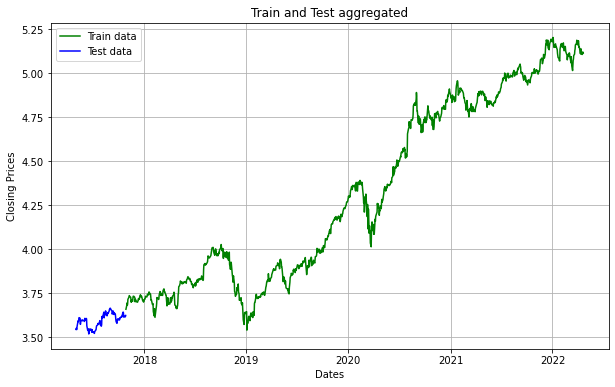

In [39]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.title("Train and Test aggregated")
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

"""
(질문은 아닙니다.)
생각해보니까 LSTM 모델은 Sequential Data를 필요로 한다는 걸 잊고 있었네요...
저는 한 Asset 가격 데이터를 세 부분으로 나누었는데, 일단 이렇게 처리한 데이터셋은 잠시 보류하고 (date index가 discrete하게 구성되어 있는 관계로),
여기 하신 것처럼 sequential daily basis로 prediction 진행하겠습니다.

아마 나뉘어진 데이터셋은 추후 sequential input 상관 없는 모델로 prediction 진행할 때 사용해도 좋을 것 같습니다.

A: 넵 sequential dataset으로 접근하는 게 더 좋을것 같습니다
"""

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5583.225, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5597.337, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5596.884, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5580.664, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5595.420, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5595.436, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5599.164, Time=1.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5591.544, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5591.494, Time=2.83 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5593.460, Time=0.72 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-5593.546, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-5589.548, Time=1.73 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-5589.643, Time=0.30 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 10.227 seconds
        

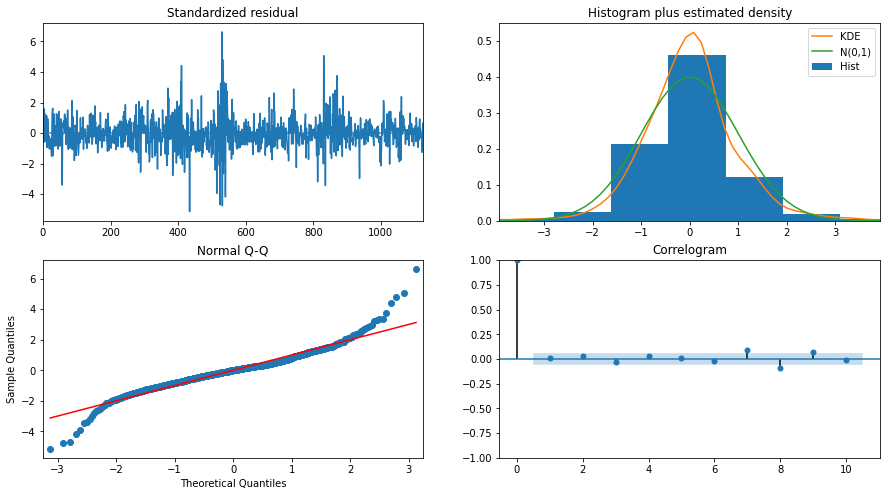

In [40]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Best Arima model (1,1,0)

Residual : mean 0 variance, so good distribution

Correlogram : Gaussian Distribution (KDE - Kernel Density Estimation)

Normal QQ: Check if the data is from valid (renown) distribution -> Slightly skewed?


In [41]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(0,1,1))  
arima_model = model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1128
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2798.509
Date:                Thu, 28 Apr 2022   AIC                          -5593.019
Time:                        07:14:57   BIC                          -5582.964
Sample:                             0   HQIC                         -5589.220
                               - 1128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1131      0.020     -5.672      0.000      -0.152      -0.074
sigma2         0.0004      1e-05     40.686      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.03   Jarque-

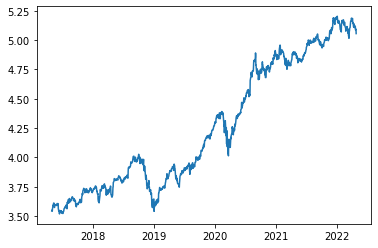

In [43]:
df_log = np.log(df['close'])
plt.plot(df_log)

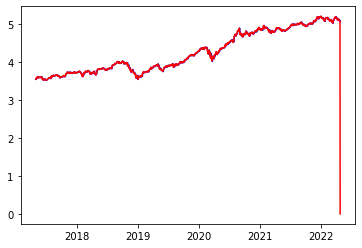

In [44]:
decomposition = seasonal_decompose(df_log,period=100) 
model = ARIMA(df_log, order=(0,1,1))
results = model.fit()

plt.plot(df_log,color='blue')
plt.plot(results.fittedvalues, color='red')

#거의 겹쳐보이는 거임;;

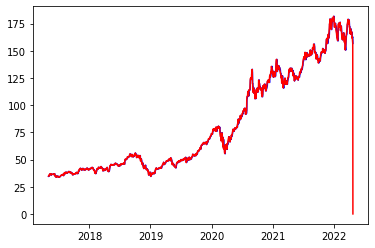

In [45]:
decomposition = seasonal_decompose(df_close,period=100) 
model = ARIMA(df_close, order=(0,1,1))
results = model.fit()

plt.plot(df_close,color='blue')
plt.plot(results.fittedvalues, color='red')

#거의 겹쳐보이는 거임;;

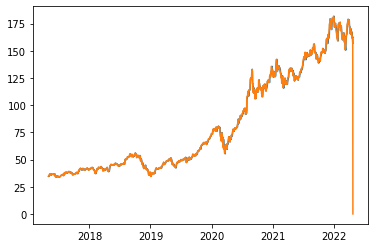

In [47]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)

plt.plot(df['close'])
plt.plot(predictions_ARIMA_diff)

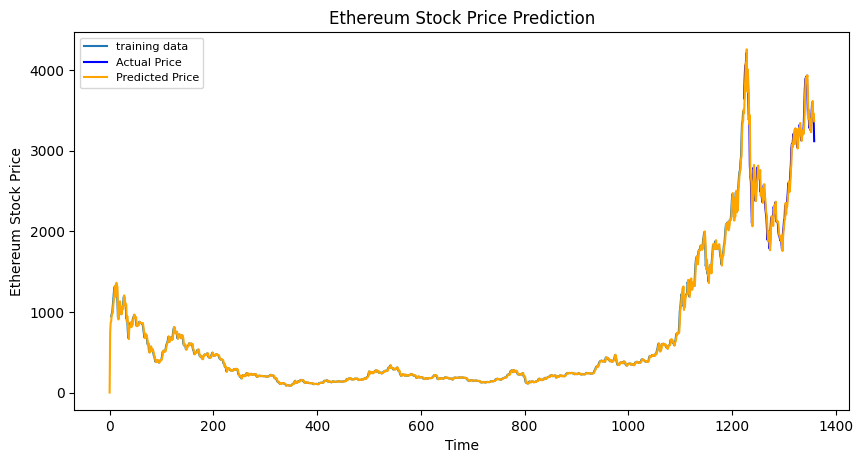

In [ ]:
fc_series = predictions_ARIMA_diff
train_data, test_data = df_close[3:int(len(df_close)*0.9)], df_close[int(len(df_close)*0.9):]


# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Price')
plt.plot(fc_series, color = 'orange',label='Predicted Price')

plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()